In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Центральная предельная теорема своими руками

Для этого задания я выбрала бета-распределение. Детальнее про это распределение здесь: 

https://en.wikipedia.org/wiki/Beta_distribution

In [9]:
a= 0.5
b = 0.5

# зададим случайную величину 
beta_rv = sts.beta(a,b)

#cгенерируем выборку объёма 1000
r=beta_rv.rvs(size=1000)

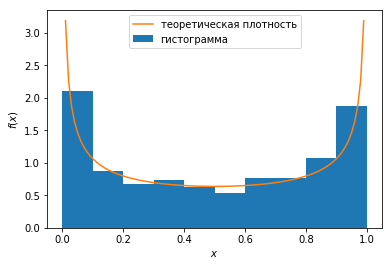

In [49]:
x = np.linspace(0,1,100)
pdf = beta_rv.pdf(x) # функция может принимать и вектор (x)
plt.hist(r, normed=True, label='гистограмма')
plt.plot(x, pdf, label='теоретическая плотность')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()

Теперь давайте посчитаем мат ожидание и дисперсию для этого распределения за следующими формулами:

Мат ожидание
$$E[X]=\frac{\alpha}{\alpha+\beta}$$

Дисперсия
$$D[X]=\frac{\alpha \beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$$

In [43]:
#расчёты мат ожидания и дисперсии средневыборочных для всех n 
mean=a/(a+b)
var=a*b/((a+b)**2*(a+b+1))

Для n=5,10,15 сгенерируем 1000 выборок обьема n и нарисуем их гистограммы 

In [35]:
n1=5
r1=beta_rv.rvs(1000*n1)
r1=r1.reshape(n1,1000)

#зададим нормально распределенную случайную величину, которая за ЦПТ приближает выборку обьема 5
norm_rv1 = sts.norm(loc=mean, scale=np.sqrt(var/n1))

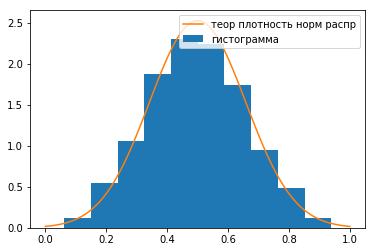

In [53]:
x = np.linspace(0,1,100)
plt.hist(r1.mean(0), normed=True, label='гистограмма')
pdf1 = norm_rv1.pdf(x) # функция может принимать и вектор (x)
plt.plot(x, pdf1,label='теор плотность норм распр') 
plt.legend(loc=1)

In [44]:
n2=10
r2=beta_rv.rvs(1000*n2)
r2=r2.reshape(n2,1000)


#зададим нормально распределенную случайную величину, которая за ЦПТ приближает выборку обьема 10
norm_rv2 = sts.norm(loc=mean, scale=np.sqrt(var/n2))

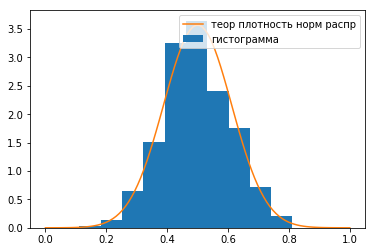

In [54]:
plt.hist(r2.mean(0), normed=True,  label='гистограмма')

pdf2 = norm_rv2.pdf(x) # функция может принимать и вектор (x)
plt.plot(x, pdf2, label='теор плотность норм распр') 
plt.legend(loc=1)

In [45]:
n3=100
r3=beta_rv.rvs(1000*n3)
r3=r3.reshape(n3,1000)


#зададим нормально распределенную случайную величину, которая за ЦПТ приближает выборку обьема 100
norm_rv3 = sts.norm(loc=mean, scale=np.sqrt(var/n3))

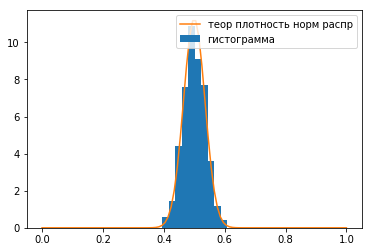

In [58]:
plt.hist(r3.mean(0), normed=True,  label='гистограмма')

pdf3 = norm_rv3.pdf(x) # функция может принимать и вектор (x)
plt.plot(x, pdf3, label='теор плотность норм распр')

plt.legend(loc=1)

# Вывод

Как можно видеть с графиков, гистограммы выборок средних хорошо приближаються нормальным распределением заданым за Центральной предельной теоремой. При возрастании обьема выборки, точность приближения тоже возрастает